<a href="https://colab.research.google.com/github/carlosinator/cil-sentiment/blob/main/resource_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
auth.authenticate_user()

In [17]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import re

# Analyze GPU History

In [8]:
# copy gpu history
EXPERIMENTS = {
    "BASEMODEL_v0": "gpu_hist_basemodel.pkl", # LR=2e-5, EPOCHS=10, stopped after 4th epoch, batch_size=256
    "READ_v0": "gpu_hist_read.pkl" # LR=2e-5, EPOCHS=10, batch_size=256, UNITS=8
}


In [9]:
CURRENT_EXP = EXPERIMENTS["BASEMODEL_v0"]

In [12]:
def load_experiment(exp_name: str):
  fname = "gs://cil_2023/models/" + exp_name
  !gsutil cp $fname .

  with open(exp_name, 'rb') as file:
    # Load the pickled object
    unpickled_object = pickle.load(file)

    return unpickled_object


In [18]:
def plot_percent_values(datapoints,
                        interval,
                        y_axis_title='GPU Ressource utilization',
                        y_label='GPU Ressource utilization [%]',
                        plot_title='GPU Ressource utilization over Time'):
    # Create a range of time values in minutes
    time_values = np.arange(0, len(datapoints)*interval, interval) / 60

    # Create a DataFrame to hold time and percent values
    df = pd.DataFrame({
        'time [in min]': time_values,
        'GPU Ressource utilization': datapoints
    })

    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='time [in min]', y=y_axis_title)

    # Set titles
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel('time [in min]')

    # Display the plot
    plt.show()

Copying gs://cil_2023/models/gpu_hist_basemodel.pkl...
- [1 files][ 49.5 KiB/ 49.5 KiB]                                                
Operation completed over 1 objects/49.5 KiB.                                     


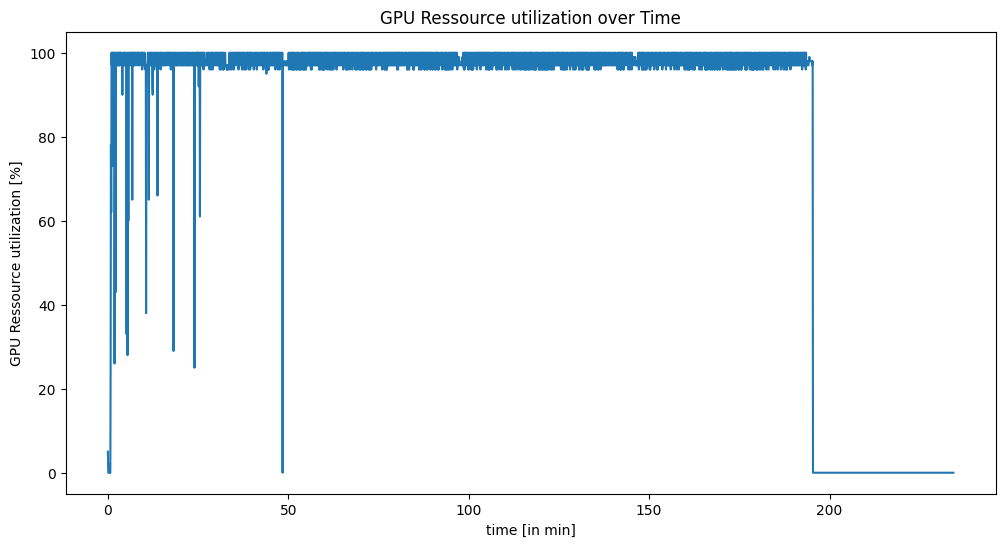

In [20]:
gpu_hist = load_experiment(EXPERIMENTS["BASEMODEL_v0"])
plot_percent_values(datapoints=gpu_hist['percent'], interval=gpu_hist["interval"])

Copying gs://cil_2023/models/gpu_hist_read.pkl...
- [1 files][ 28.0 KiB/ 28.0 KiB]                                                
Operation completed over 1 objects/28.0 KiB.                                     


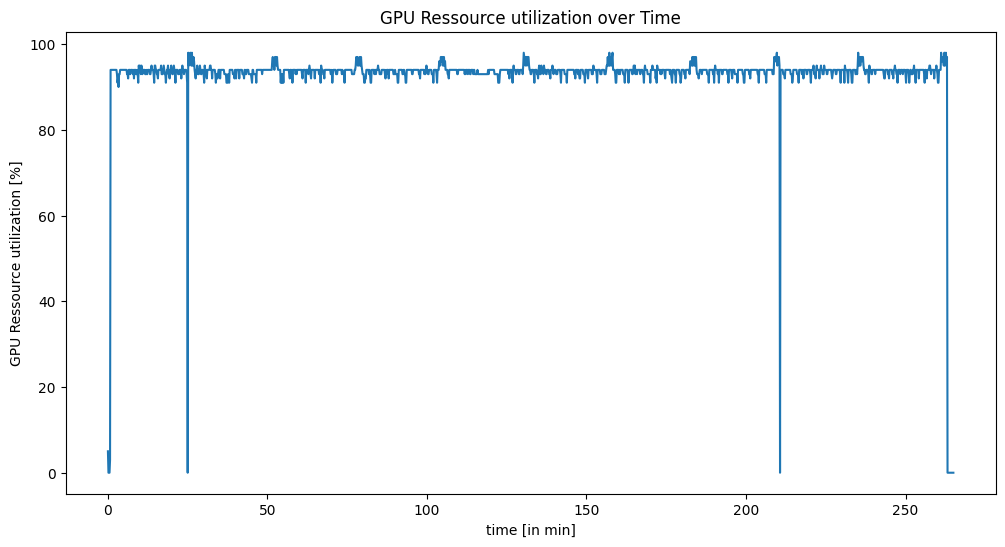

In [21]:
gpu_hist = load_experiment(EXPERIMENTS["READ_v0"])
plot_percent_values(datapoints=gpu_hist['percent'], interval=gpu_hist["interval"])